# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 24th, 23:00 h** 

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

In this laboratory we will treat the following main topics:

1) Template matching
    - Normalized Cross-correlation
    - Application to object (eye) detection 

2) Image Descriptors: "Sliding window" and HOG image descriptor
   - Application to object (person) detection

3) Image matching (recognition by correspondance) based on feature extraction (ORB)
    - Application to object (logo) detection
    
In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

All code should be commented in English. Answers of the questions and comments on the exercises should be given in English too.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

## 1 Template matching

1.1 Given the image 'einstein.png' and the template image 'eye.png', detect the location of the template in the image comparing the use of:
- euclidean distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

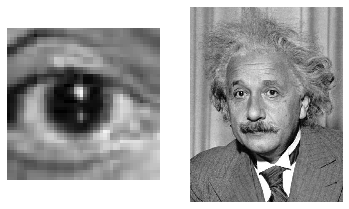

In [1]:
# Show the original image and the template image
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(1,2,1)
eye=io.imread('./images/eye.png')
plt.imshow(eye)
plt.axis('off')

plt.subplot(1,2,2)
einstein=io.imread('./images/einstein.png')
plt.imshow(einstein)
plt.axis('off')

plt.show()



1.1. Create a function for template matching applying euclidean distance and normalized cross-correlation and display the results in this format:
    
<img src="images_notebook/tm.png" width="400" height="120">

**Use titles in all figures to understand what is being displayed.**

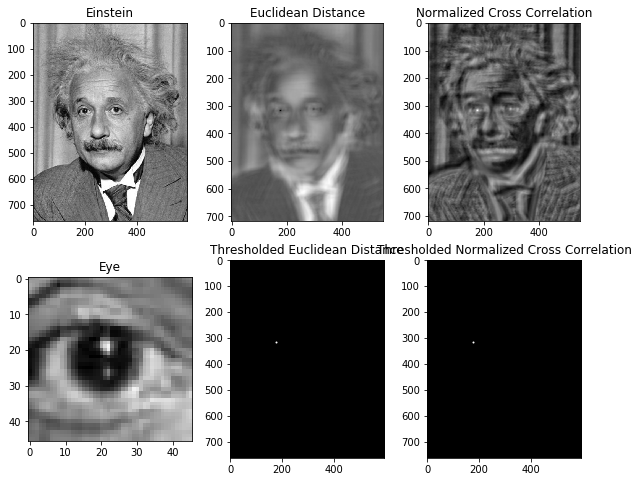

Similarity of pattern being (316, 178) is: 1.9895304595412764


In [20]:
# Your solution here
import skimage
from skimage import feature
from skimage import color

"""
Compute euclidean distance between 2 matrix
"""
def get_matrix_diference(m1, m2):
    return np.linalg.norm(m1-m2)

"""
Compute dot product of 2 matrix
"""
def get_dot_product(m1,m2):
    return np.vdot(m1,m2)

"""
Sliding window for matching a template in an image.
"""
def slide_apply(template, original, to_apply, step = 1):
    
    #Transform into grayscale
    template = color.rgb2gray(template)
    original = color.rgb2gray(original)
    
    #Transform into float
    template = skimage.img_as_float(template)
    original = skimage.img_as_float(original)
    result = np.zeros((original.shape[0] - template.shape[0],original.shape[1] - template.shape[1]))

    #Iterate trough original image
    for i in range(0,original.shape[0] - template.shape[0],step):
        for j in range(0,original.shape[1] - template.shape[1],step):
            
            # Generate a cutout of the shape of the template from the original image
            cutout = original[i:i + template.shape[0], j:j + template.shape[1]]
            
             # Save euclidean distance from cutout to template at this position to result matrix
            result[i,j] = to_apply(template,cutout)
            
    return result


def euclidean_distance(template, original , step = 1):
    # Slide and apply  the specified function iteratively to the whole image
    return slide_apply(template, original, get_matrix_diference)


def normalized_cross_correlation(template, original):
    #Transform into grayscale
    template = color.rgb2gray(template)
    original = color.rgb2gray(original)
    
    #Transform into float
    template = skimage.img_as_float(template)
    original = skimage.img_as_float(original)
    
    result = feature.match_template(original, template)
    return result

def show_matching_results(eye, einstein):
    
    euclidean_result = euclidean_distance(eye,einstein)
    normalized_crossCorrelation_result = normalized_cross_correlation(eye,einstein)
    
    # Retrieve indices corresponding to minimum value in sliding window result image
    thresholded_euclidean_indices = np.unravel_index(np.argmin(euclidean_result),euclidean_result.shape)
    
    # Retrieve indices corresponding to maximum value in sliding window result image
    thresholded_crossCorrelation_indices = np.unravel_index(np.argmax(normalized_crossCorrelation_result),normalized_crossCorrelation_result.shape)
    
    f, img = plt.subplots(ncols=3, nrows=2,figsize=(10,8))
    
    #Original 
    img[0,0].imshow(einstein,cmap = "gray")
    img[0,0].set_title("Einstein")
    
    img[1,0].imshow(eye,cmap = "gray")
    img[1,0].set_title("Eye")
    
    #Euclidean Distance
    img[0,1].imshow(euclidean_result,cmap = "gray")
    img[0,1].set_title("Euclidean Distance")
    
    img[1,1].imshow(np.zeros((einstein.shape[0], einstein.shape[1])),cmap = "gray")
    img[1,1].plot(thresholded_euclidean_indices[1],thresholded_euclidean_indices[0],"o", 
                     markeredgecolor = "w", markerfacecolor = "none", markersize = 1)
    img[1,1].set_title("Thresholded Euclidean Distance")
    
    #Normalized Cross Correlation
    img[0,2].imshow(normalized_crossCorrelation_result,cmap = "gray")
    img[0,2].set_title("Normalized Cross Correlation")
    
    img[1,2].imshow(np.zeros((einstein.shape[0], einstein.shape[1])),cmap = "gray")
    img[1,2].plot(thresholded_crossCorrelation_indices[1],thresholded_crossCorrelation_indices[0],"o", 
                    markeredgecolor = "w", markerfacecolor = "none", markersize = 1)
    img[1,2].set_title("Thresholded Normalized Cross Correlation")
    
    plt.show()
    print("Similarity of pattern being {} is: {}".format(thresholded_euclidean_indices,euclidean_result.min()))


original = show_matching_results(eye, einstein)

How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? To this purpose, read the images "einstein_br.png" and "einstein_mask.png".

Visualize the normalized cross-correlation image between the template and the image as well as this very same image in a binarized form in order to show where is the minimal distance between the template and the image. 

Use titles of the figures to explain what is displayed.


1.2 Display the results on `einstein_br.png`:

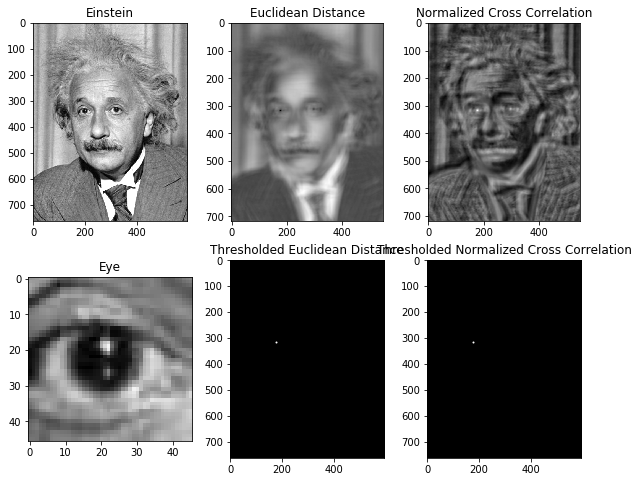

Similarity of pattern being (316, 178) is: 3.0698531963845404


In [21]:
# Your solution here
einstein_br = io.imread('./images/einstein_br.png')
mask = show_matching_results(eye,einstein_br)

1.3 Display the results on `einstein_mask.png`:

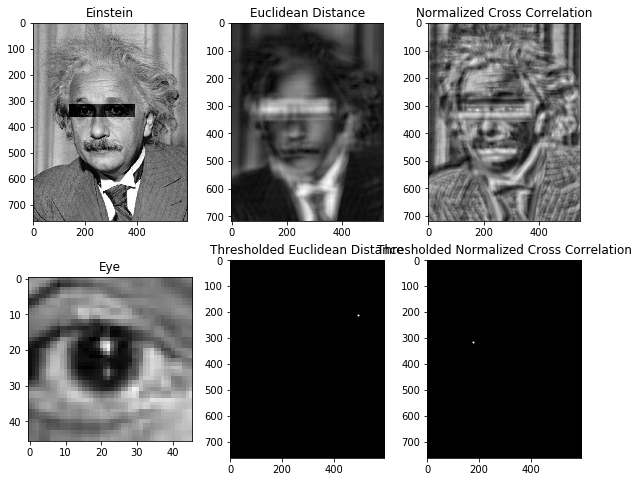

Similarity of pattern being (211, 491) is: 8.27263708944657


In [22]:
# Your solution here
einstein_mask = io.imread('./images/einstein_mask.png')
mask = show_matching_results(eye,einstein_mask)

1.4.
* How does the minimum distance between the template and the image change? 
* What are the minimal distance pixels in the correlation images? 
* What are the distances between the template and the image around the eyes of the image? 

### Answers

- The distance between the template and the image is defined using the norm of the difference between a subset of the original image and the template at any point.

- In the first image the pixels goes from (316, 178) to (316, 178). In the second image the pixels goes from (316, 178) to (211, 491)

- The distance between the template and the image around the eyes of the image are the minimum. In the first image goes from 1.98 to 3.06 and the second image goes from 3.06 to 8.27


1.5 How does the result of the template matching change if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the 'eye_br.png' template.

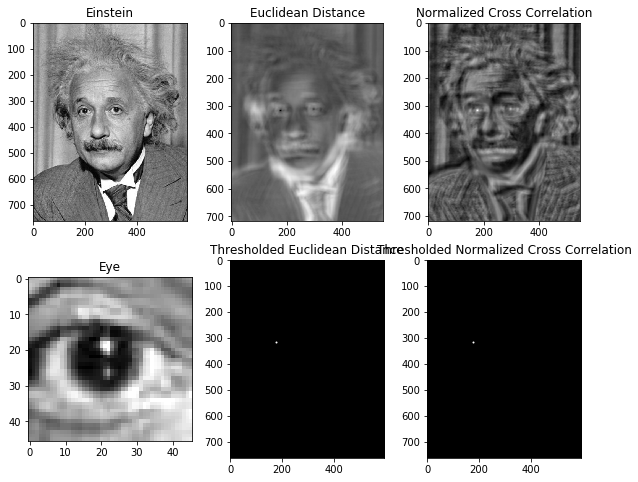

Similarity of pattern being (316, 178) is: 5.270435388179585


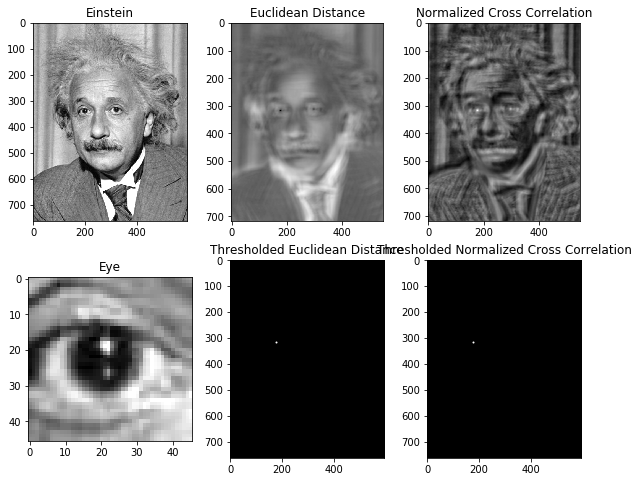

Similarity of pattern being (316, 178) is: 3.3431230362899194


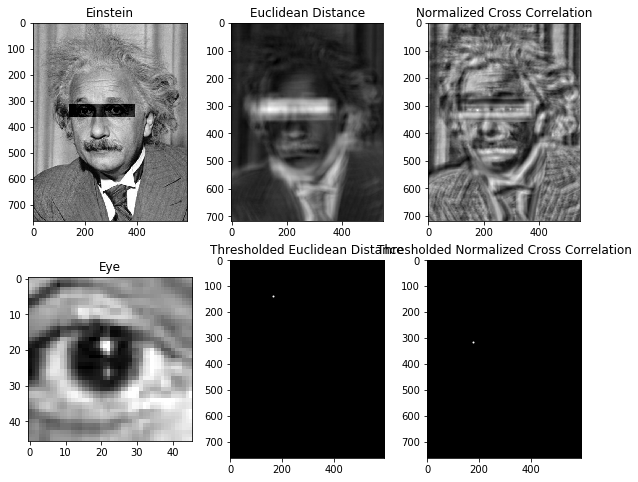

Similarity of pattern being (138, 164) is: 9.526359559866115


In [25]:
# Your solution here
eye_br = color.rgb2gray(io.imread('./images/eye_br.png'))
show_matching_results(eye_br, einstein)
show_matching_results(eye_br, einstein_br)
show_matching_results(eye_br, einstein_mask)

### Answer
- This case is similar to the previous ones of einstein and einstein_br, the sliding windows distances have increased evenly throught the whole image as result of comparing to a slightly brigther template

1.6 Check how the result changes if the template is rotated. Visualize the template and its rotation by 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.
Help: use the function rotate() in skimage.transform

EYE rotation 10º


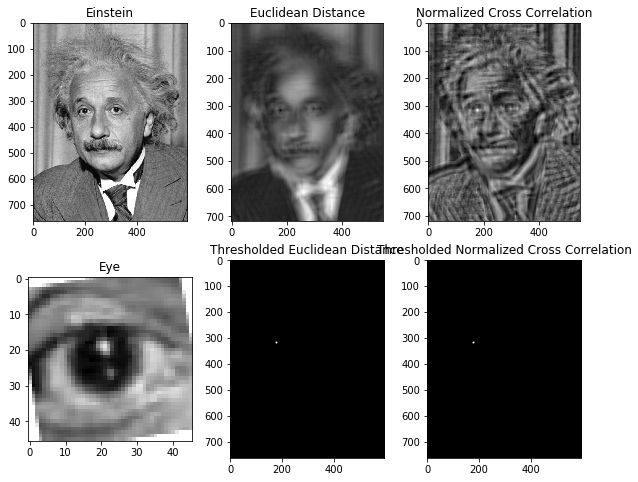

EYE rotation 15º


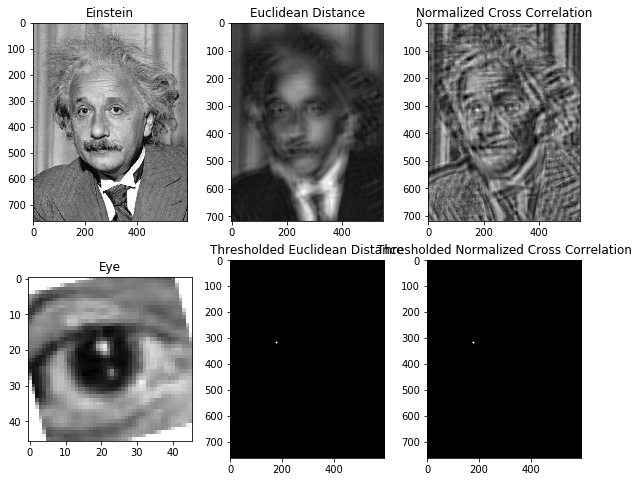

EYE rotation 20º


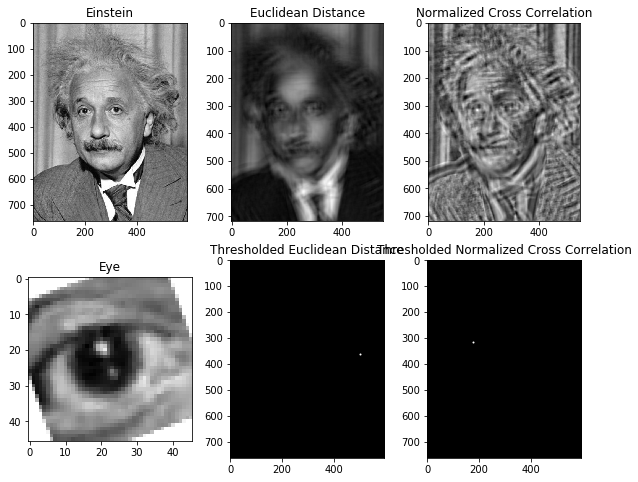

In [27]:
# Your solution here
from skimage.transform import rotate
eye10 = rotate(eye,10)
eye15 = rotate(eye,15)
eye20 = rotate(eye,20)

print("EYE rotation 10º")
eye10_result = show_matching_results(eye10,einstein)

print("EYE rotation 15º")
eye15_result = show_matching_results(eye15,einstein)

print("EYE rotation 20º")
eye20_result = show_matching_results(eye20,einstein)

1.7 Comment what is the template matching process, what advantages and disadvantages it has, how sensible is to image deformation in photometric and spatial dimensions, what parameters it has and which measure for image comparisons works better.

### Answer
As we can see above, the distances do not change much between the 10º and 15º rotations.
On the other hand, if we rotate 20º we can observe that the minimum distances change drastically.

# 2 Histogram of Oriented Gradients

In this section we will treat the following topic: HOG image descriptor. Application to object (person) detection.

The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image 'person_template.png' and the folder '/images/TestPersonImages/', apply the HOG descriptor in order to detect where there is a person in the images. To this purpose, apply the "sliding window" technique. We use images from GRAZ 01 data from [INRIA datasets](http://pascal.inrialpes.fr/data/human/).

2.1. Read the template ('person_template.png'), obtain its HOG descriptor (with the optimal parameters) and visualize it.

Help: the HOG detector function is in the skimage.feature library ([Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py)).

In [29]:
# Your solution here

2.2. Apply the HOG descriptor on the complete set of images for person detection.

a) Read images from the folder "TestPersonImages", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the person template. 

b) Visualize the location in the image that is the most similar to the person template using the distance between the template and test image descriptors.

Display the results of every person detection following this format:

<img src="images_notebook/hog.png" width="800" height="100">

In [30]:
# Your solution here

In [31]:
# Your solution here

In [32]:
# Your solution here

3.3. 
- Count on how many images were the persons detected correctly and discuss the failures. What do you think can be the reasons for the failures?
- Discuss what are the parameters of the HOG algorithm. Test several values of the parameters up to your criterion to show which are the optimal values for the person detection problem.
- Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

In [33]:
# Your solution here

# 3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

Let us focus on ORB, an approximation of SIFT method, and analyse if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images. 

3.1
(a) Detect the censure in the image `starbucks4.jpg`. 

(b) Analyze and discuss the effect of different values of the parameters in censure function.



I found  96 keypoints


Text(0.5, 1.0, 'Keypoints in Starbucks Image')

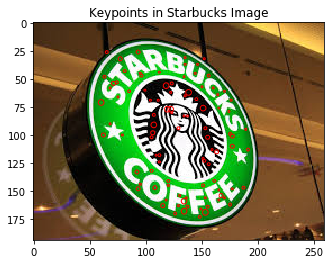

In [34]:
# Your solution here
from skimage.color import rgb2gray
from skimage.feature import CENSURE

img_starbucks=io.imread('./images/starbucks4.jpg')
img_gr_starbucks = rgb2gray(img_starbucks)

detector = CENSURE()
detector.detect(img_gr_starbucks)
print('I found ', len(detector.keypoints), 'keypoints')

plt.imshow(img_starbucks, cmap=plt.cm.gray)
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
plt.title("Keypoints in Starbucks Image")


3.2 

(a) Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks4.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. 

Define a function get_ORB implementing the algorithm in order to be able to apply it on different images. Comment the code in detail.

**Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.**

(b) Analyze and discuss the effect of different values of the parameter `max_ratio` in the match_descriptors function.


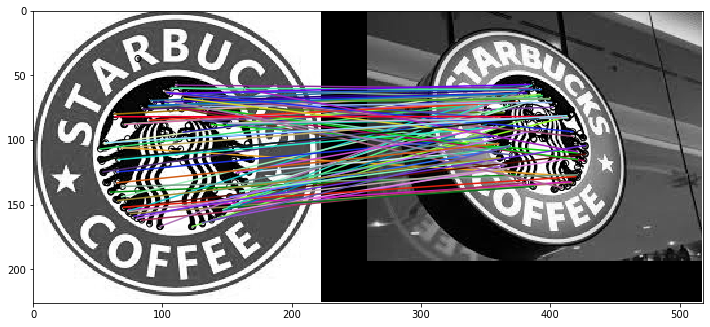

In [35]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


# Read the image
starbucks = io.imread('./images/starbucks.jpg')
starbucks4 = io.imread('./images/starbucks4.jpg')

def get_matches(image1, image2, show = True):
    
    #Obtain ORB
    descriptor_extractor = ORB(n_keypoints=200)
    
    # Obtain image keypoints and descriptors
    descriptor_extractor.detect_and_extract(image1)
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors
    
    descriptor_extractor.detect_and_extract(image2)
    keypoints2 = descriptor_extractor.keypoints
    descriptors2 = descriptor_extractor.descriptors
    
    # Match keypoints
    matches = match_descriptors(descriptors1, descriptors2, cross_check=True)
    
    return (keypoints1,keypoints2,matches)

def show_orb(image1, image2):
    
    # Transform image to float and grayscale
    image1 = rgb2gray(skimage.img_as_float(image1))
    image2 = rgb2gray(skimage.img_as_float(image2))
    
    # Display
    fig, img =plt.subplots(nrows = 1, ncols = 1, figsize=(12,6))
    plt.gray()
    
    matches = get_matches(image1,image2)
    plot_matches(img, image1, image2, matches[0], matches[1], matches[2])

    plt.show()
    
show_orb(starbucks,starbucks4)

3.2 Repeate the experiment comparing the "starbucks.jpg" image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when does the algorithm work better. 

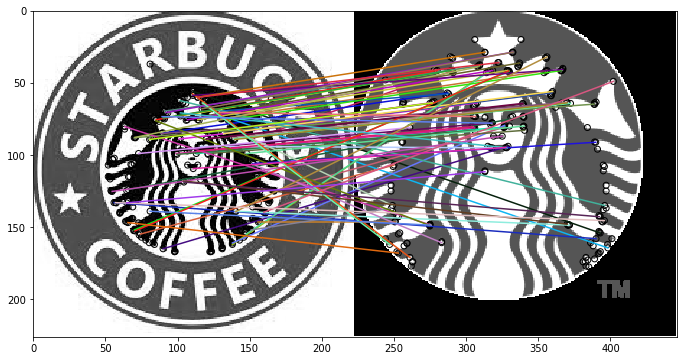

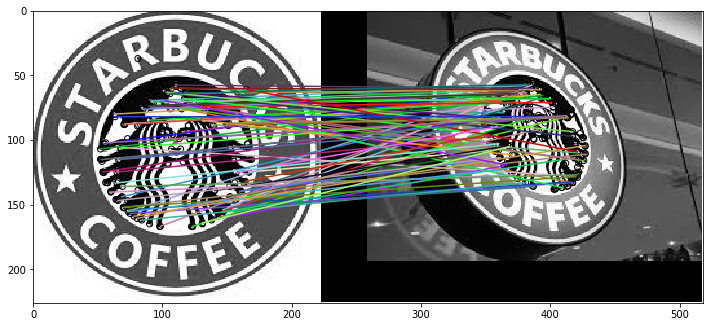

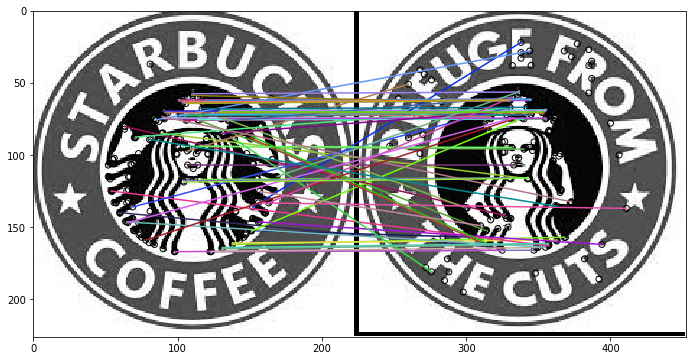

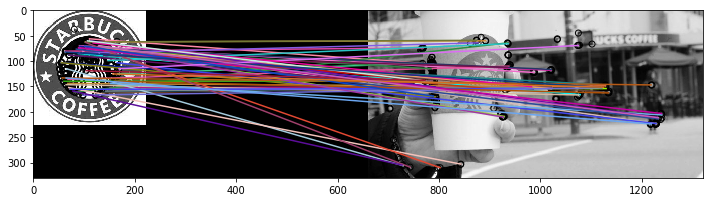

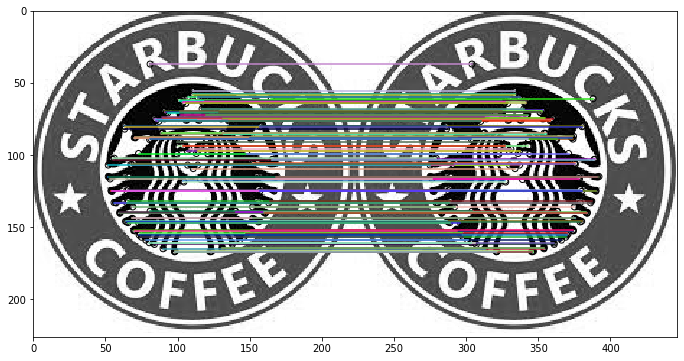

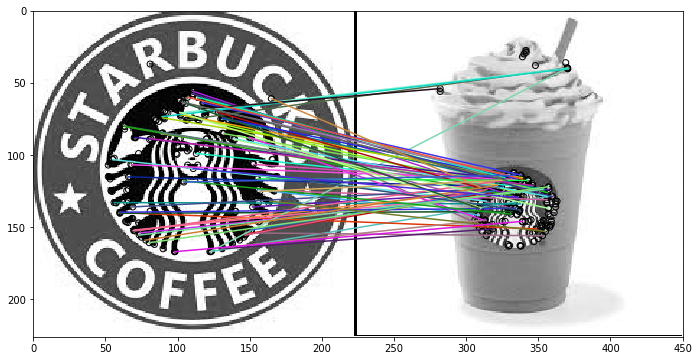

In [36]:
# Your solution here
starbucks_images = io.ImageCollection('./images/starbucks*')

for img in starbucks_images:
    show_orb(starbucks, img)

3.3 Repeate the experiment in 3.2: 
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform 
- Change the scale and orientation of the scene image and compare it with the model image.

Help: To do so, you can use the function given below as example:

import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)

or

tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(image2transform, tform)

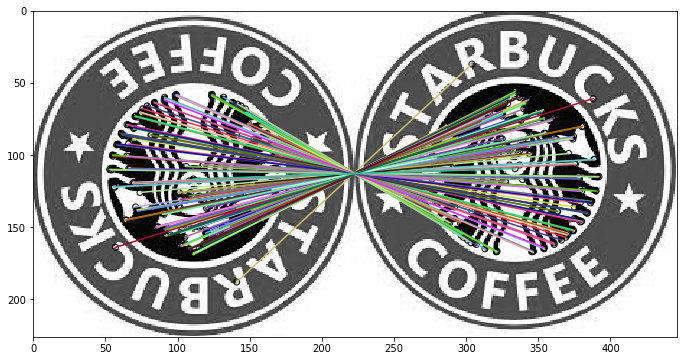

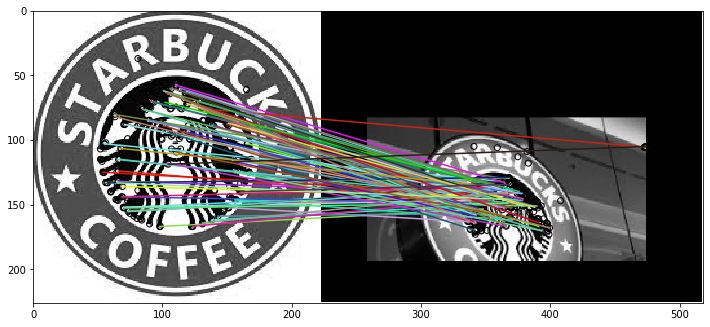

In [37]:
# Rotate 180º
starbucks_rotated = rotate(starbucks,180)

#Rotated and rescaled image
transform = tf.AffineTransform(scale=(1.2,1.2), translation=(0,-100))
starbucks4_transformed = tf.warp(starbucks4, transform)

show_orb(starbucks_rotated, starbucks)
show_orb(starbucks, starbucks4_transformed)

3.4 **(Optional)** Repeat the experiment (3.1 to 3.3) with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.



In [19]:
# Your solution here

3.5 Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

- What would happen if you analyse an image that does not contain the Starbucks logo? 

- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it) 

# Answer
a) ***ORB detection*** an not only detect the location of a template in an image, but also extract its distinctive features and match them adequately in both images. Also is invariant to rotation and transformation.

b) The distinctive features of both images would be extracted, but ***matched in the most approximate way***

c)One proposal would be to **measure the relative position of distinctive features** among themselves in both images and compare them.

### Appendix

In [20]:
# In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)